# 00 TensorFlow Fundamentals

In [2]:
import tensorflow as tf
import numpy as np


## 01 What is a tensor?

* It's a primary data structure used by neural networks.
* It's an n-dimensional array of numbers.
* When using deep learning, we prefer tensors over numpy arrays.
* Reason: Tensors works well with GPU and helps in faster training of a deep learning model. 

## 02 Create a scalar in tensorflow

In [3]:
scalar = tf.constant(7)

## 03 Create a vector in tensorflow

In [4]:
vector = tf.constant([3, 4])

## 04 Create a matrix in tensorflow

In [5]:
matrix = tf.constant([[3, 4],
                      [4, 5]])

## 05 Check dimensions

In [6]:
print(scalar.ndim)
print(vector.ndim)
print(matrix.ndim)

0
1
2


what we have created so far

* scalar = a single number
* vector = a number with direction
* matrix = a two dimensional array of numbers 
* tensor = an n-dimensional array of numbers

## 06 Changable & Unchangable tensors

In [7]:
unchangable = tf.constant([3,4])
changable = tf.Variable([3,4])

In [8]:
# changable tensors can be changed by '.assign()'
changable[0].assign(7)
print(changable)

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 4], dtype=int32)>


In [9]:
unchangable[0].assign(7)

AttributeError: ignored

## 07 What is random seed?

* .seed() method is used to initialize the random number generator. 
* If this method is not used, the default start number  is based on system time.

In [30]:
# creating 3 random tensors
random_1 = tf.random.Generator.from_seed(42)
random_1 = random_1.normal(shape=(3, 2))

random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))

random_3 = tf.random.Generator.from_seed(24)
random_3 = random_3.normal(shape=(3, 2))

In [31]:
print(random_1 == random_2)
print(random_1 == random_3)

tf.Tensor(
[[ True  True]
 [ True  True]
 [ True  True]], shape=(3, 2), dtype=bool)
tf.Tensor(
[[False False]
 [False False]
 [False False]], shape=(3, 2), dtype=bool)


## 08 Shuffling the tensors

In [32]:
not_shuffled = tf.constant([[3, 4],
                            [4, 5],
                            [5, 6]])

shuffled = tf.random.shuffle(not_shuffled)

shuffled

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[3, 4],
       [4, 5],
       [5, 6]], dtype=int32)>

## 09 Creating tensors of 1's and 0's

In [33]:
ones = tf.ones([3, 2])
zeros = tf.zeros([3, 2])

print(ones)
print(zeros)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)
tf.Tensor(
[[0. 0.]
 [0. 0.]
 [0. 0.]], shape=(3, 2), dtype=float32)


## 10 Turning numpy array into tensor

In [34]:
numpy_A = np.arange(1,25,dtype=int)
numpy_A

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

In [35]:
A = tf.constant(numpy_A)
A

<tf.Tensor: shape=(24,), dtype=int64, numpy=
array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])>

In [36]:
B = tf.constant(numpy_A, shape=(2,3,4))
B

<tf.Tensor: shape=(2, 3, 4), dtype=int64, numpy=
array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])>

## 11 Slicing a tensor 

In [37]:
B[:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2), dtype=int64, numpy=
array([[[ 1,  2],
        [ 5,  6]],

       [[13, 14],
        [17, 18]]])>

## 12 Adding an extra dimension to a tensor

In [38]:
C = tf.expand_dims(B,axis=0)
C.shape

TensorShape([1, 2, 3, 4])

## 13 Tensor operations

In [39]:
tensor = tf.constant([[3,4],
                      [5,6]])

add = tensor + 10
print(add)
print()

sub = tensor - 10
print(sub)
print()

multi = tensor * 10
print(multi)
print()

div = tensor / 10
print(div)

tf.Tensor(
[[13 14]
 [15 16]], shape=(2, 2), dtype=int32)

tf.Tensor(
[[-7 -6]
 [-5 -4]], shape=(2, 2), dtype=int32)

tf.Tensor(
[[30 40]
 [50 60]], shape=(2, 2), dtype=int32)

tf.Tensor(
[[0.3 0.4]
 [0.5 0.6]], shape=(2, 2), dtype=float64)


## 14 Matrix multipication in tensorflow

In [40]:
A = tf.constant([[3, 4],
                [5, 6]])

# Element wise multiplication
print(A * A)
print()

# matrix multiplication
print(A @ A)

tf.Tensor(
[[ 9 16]
 [25 36]], shape=(2, 2), dtype=int32)

tf.Tensor(
[[29 36]
 [45 56]], shape=(2, 2), dtype=int32)


## 15 Change datatype of tensor

In [41]:
E = tf.cast(A, dtype=tf.float16)

print(A.dtype)
print(E.dtype)

<dtype: 'int32'>
<dtype: 'float16'>


## 16 Some tensorflow statistics

In [42]:
I = tf.constant(np.random.randint(0,100,size=50))
print(I)

tf.Tensor(
[18 52 41 90 34 59 14 85 42 86 64 38  6  8 35  3  6 39 53 81 14 44 81 41
 87 73 91 35  5 32 32 14 79 72 13 81 99 29 57 83 38 25 14 90 15 19 55 46
 91  3], shape=(50,), dtype=int64)


In [43]:
min = tf.reduce_min(I)
min

<tf.Tensor: shape=(), dtype=int64, numpy=3>

In [44]:
max = tf.reduce_max(I)
max

<tf.Tensor: shape=(), dtype=int64, numpy=99>

In [45]:
sum = tf.reduce_sum(I)
sum

<tf.Tensor: shape=(), dtype=int64, numpy=2312>

In [46]:
import tensorflow_probability as tfp
var = tfp.stats.variance(I)
var

<tf.Tensor: shape=(), dtype=int64, numpy=865>

In [47]:
std_dev = tfp.stats.stddev(tf.cast(I,dtype=tf.float16))
std_dev

<tf.Tensor: shape=(), dtype=float16, numpy=29.42>

## 17 Finding position of max and min element in a tensor

In [48]:
F = tf.constant(np.random.uniform(size=50))
F

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([0.99318425, 0.29861728, 0.4738228 , 0.8175981 , 0.24899476,
       0.62397069, 0.28448312, 0.46979699, 0.81795351, 0.19119863,
       0.47516001, 0.29793599, 0.64392963, 0.26170293, 0.29982215,
       0.54220802, 0.17455411, 0.99074953, 0.97061477, 0.39565884,
       0.58804928, 0.64097952, 0.44753115, 0.87275115, 0.12887186,
       0.70424817, 0.01309728, 0.0893157 , 0.49119734, 0.67960604,
       0.48751312, 0.99750443, 0.23448513, 0.93363167, 0.11775829,
       0.14315635, 0.80828727, 0.35406897, 0.64420803, 0.60091176,
       0.80209462, 0.78080432, 0.00962969, 0.04602623, 0.59537124,
       0.34407399, 0.53512584, 0.04791463, 0.0817017 , 0.27377723])>

In [50]:
min_index = tf.argmin(F)
min_index, F[min_index]

(<tf.Tensor: shape=(), dtype=int64, numpy=42>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.009629689455294854>)

In [51]:
max_index = tf.argmax(F)
max_index, F[max_index]

(<tf.Tensor: shape=(), dtype=int64, numpy=31>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.997504431725341>)

## 18 Squeezing the tensor

In [52]:
G = tf.constant(tf.random.uniform(shape=[50]),
                shape=(1,1,1,50))
print(G.shape)
print()
G_squeezed = tf.squeeze(G)
print(G_squeezed.shape)

(1, 1, 1, 50)

(50,)


## 19 One Hot Encoding tensor

In [56]:
some_list = [0,1,2,3]

print(tf.one_hot(some_list, depth=4))
print()
print(tf.one_hot(some_list, depth=4, on_value='Yes',off_value='No'))

tf.Tensor(
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]], shape=(4, 4), dtype=float32)

tf.Tensor(
[[b'Yes' b'No' b'No' b'No']
 [b'No' b'Yes' b'No' b'No']
 [b'No' b'No' b'Yes' b'No']
 [b'No' b'No' b'No' b'Yes']], shape=(4, 4), dtype=string)


## 20 Some math functions

In [64]:
E = tf.range(1,24)
E = tf.cast(E,dtype=tf.float16)

In [58]:
tf.math.square(E)

<tf.Tensor: shape=(23,), dtype=int32, numpy=
array([  1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121, 144, 169,
       196, 225, 256, 289, 324, 361, 400, 441, 484, 529], dtype=int32)>

In [62]:
tf.math.sqrt(tf.cast(E,dtype=tf.float16))

<tf.Tensor: shape=(23,), dtype=float16, numpy=
array([1.   , 1.414, 1.732, 2.   , 2.236, 2.45 , 2.646, 2.828, 3.   ,
       3.162, 3.316, 3.465, 3.605, 3.742, 3.873, 4.   , 4.125, 4.242,
       4.36 , 4.473, 4.582, 4.69 , 4.797], dtype=float16)>

In [65]:
tf.math.log(E)

<tf.Tensor: shape=(23,), dtype=float16, numpy=
array([0.    , 0.6934, 1.099 , 1.387 , 1.609 , 1.792 , 1.946 , 2.08  ,
       2.197 , 2.303 , 2.398 , 2.484 , 2.564 , 2.639 , 2.709 , 2.773 ,
       2.834 , 2.89  , 2.945 , 2.996 , 3.045 , 3.092 , 3.135 ],
      dtype=float16)>

# 01 Regression & Classification using TensorFlow

## 01 Steps for making an ML model

1. Create a model - Define the input, output & hidden layers of the deep learning model.
2. Compile the model - Define a loss function, an optimizer and an evaluation metric. 
3. Fitting the model - Letting the model learn patterns between X & y. 

## 02 Steps for modelling with tensorflow

1. Getting data ready(turning into tensors).
2. Build or pick a pretrained model.
3. Fit the model to data & make prediction.
4. Evaluate the model.
5. Improve through experimentation.
6. Save and reload your trained model.

## 03 Some basic definations

* Epoch - Number of times the algorithm runs on the whole training dataset.
* Sample - A single row of dataset
* Batch - It denotes the number of samples to be taken for updating the model parameters.
* Learning rate - It is a parameter that provides the model a scale on how much model weights should be updated.
* Loss function - A function that gives difference between predicted value & the actual value.
* Weights/Bias - The learnable parameter in a model that controls the signal between two neurons. 

## 04 Sequential and Functional API

* There are 2 ways of building keras models:
> * Sequential 
> * Functional

* The Sequential API allows you to create models layer-by-layer for most problems. Sequential API doesn't allow you to create models that shares layers or have multiple inputs or outputs.

* Alternately, the functional API allows you to create models that have a lot more flexibility as you can easily define models where layers connect to more than just the previous & next layers. You can connect a layer to any other layer


## 05 Regression using TensorFlow

In [1]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# read in the insurance dataset (the below link is obtained from github>raw)
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Let's try one hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [12]:
# create X and y values (features and labels)
X = insurance_one_hot.drop("charges",axis=1)
y = insurance_one_hot['charges']

In [13]:
# creating train and test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [14]:
X_train = tf.constant(X_train)
y_train = tf.constant(y_train)
X_test = tf.constant(X_test)
y_test = tf.constant(y_test)

In [15]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(100, activation='relu'),
                                       tf.keras.layers.Dense(100, activation='relu'),
                                       tf.keras.layers.Dense(100, activation='relu'),
                                       tf.keras.layers.Dense(100, activation='relu'),
                                       tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.Adam(learning_rate=0.0095),
                        metrics = "mae"
                        )

# 3. Fitting the model
history = insurance_model.fit(X_train, y_train, epochs = 50)

Epoch 1/50
34/34 [==============================] - 1s 4ms/step - loss: 9583.9033 - mae: 9583.9033
Epoch 2/50
34/34 [==============================] - 0s 3ms/step - loss: 7112.3315 - mae: 7112.3315
Epoch 3/50
34/34 [==============================] - 0s 4ms/step - loss: 6471.3115 - mae: 6471.3115
Epoch 4/50
34/34 [==============================] - 0s 3ms/step - loss: 6043.1177 - mae: 6043.1177
Epoch 5/50
34/34 [==============================] - 0s 3ms/step - loss: 5000.4541 - mae: 5000.4541
Epoch 6/50
34/34 [==============================] - 0s 3ms/step - loss: 3835.1191 - mae: 3835.1191
Epoch 7/50
34/34 [==============================] - 0s 3ms/step - loss: 3679.3142 - mae: 3679.3142
Epoch 8/50
34/34 [==============================] - 0s 4ms/step - loss: 3393.2324 - mae: 3393.2324
Epoch 9/50
34/34 [==============================] - 0s 3ms/step - loss: 3127.3545 - mae: 3127.3545
Epoch 10/50
34/34 [==============================] - 0s 3ms/step - loss: 3183.9744 - mae: 3183.9744
Epoch 11/

In [16]:
# check the results of insurance model on the test data
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2232.2280 - mae: 2232.2280


[2232.22802734375, 2232.22802734375]

Text(0.5, 0, 'epochs')

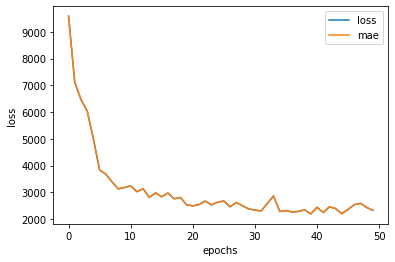

In [17]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## 06 Ways to improve a regression model

* While creating model
> * Add more layers.
> * Increase the number of hidden units in a layer.
> * Change activation layers.

* While compiling
> * Changing the activation function.
> * Changing the learning rate.

* While fitting
> * Increasing epochs.
> * Increasing the input data.

## 07 Saving a model

There are two main formats to save our models-
* The Saved Model format
* The HDF5 format

In [18]:
insurance_model.save('first_deep_regression_model')
insurance_model.save('first_deep_regression_model.h5')

## 08 Loading a model

In [19]:
loaded_saved_model = tf.keras.models.load_model('first_deep_regression_model')
loaded_HDF5_model = tf.keras.models.load_model('first_deep_regression_model.h5')

In [20]:
insurance_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2232.2280 - mae: 2232.2280


[2232.22802734375, 2232.22802734375]

In [21]:
loaded_saved_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 4ms/step - loss: 2232.2280 - mae: 2232.2280


[2232.22802734375, 2232.22802734375]

In [22]:
loaded_HDF5_model.evaluate(X_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 2232.2280 - mae: 2232.2280


[2232.22802734375, 2232.22802734375]

## 09 Classification using TensorFlow

**Typical architecture of a classification neural network** 

The architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

***Table 1:*** *Typical architecture of a classification network.* ***Source:*** *Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)*

In [23]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

Okay, 60,000 training examples each with shape (28, 28) and a label each as well as 10,000 test examples of shape (28, 28).

But these are just numbers, let's visualize.

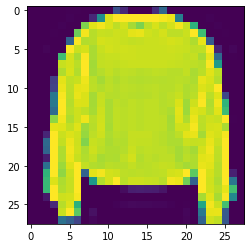

In [24]:
# Plot a single example
import matplotlib.pyplot as plt
plt.imshow(train_data[7]);

In [25]:
# Check our samples label
train_labels[7]

2

In [26]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

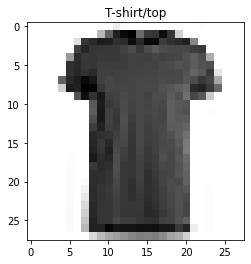

In [27]:
# Plot an example image and its label
plt.imshow(train_data[17], cmap=plt.cm.binary) # change the colours to black & white
plt.title(class_names[train_labels[17]]);

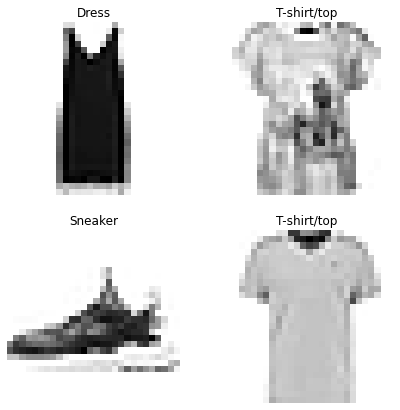

In [28]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [29]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_11.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [30]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [31]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [32]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_12 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_12.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

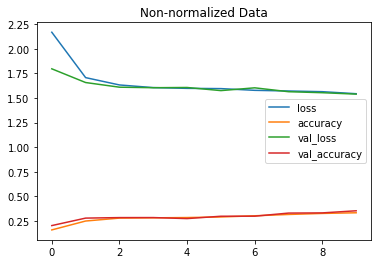

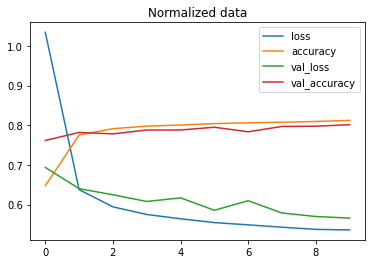

In [33]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data");

In [34]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [36]:
# Make predictions with the most recent model
y_probs = model_12.predict(test_data) # "probs" is short for probabilities

# View the first 5 predictions
y_probs[:5]

array([[2.67575240e-10, 8.36207697e-15, 4.81270290e-05, 3.40115491e-08,
        1.23736827e-04, 2.73353249e-01, 3.39613962e-07, 8.82699341e-02,
        6.16736943e-03, 6.32037222e-01],
       [8.12876970e-05, 5.76154818e-15, 9.49077964e-01, 7.81001347e-07,
        8.87467805e-03, 8.59926008e-13, 4.17942293e-02, 5.20495725e-26,
        1.70956584e-04, 7.83172140e-08],
       [1.09286455e-04, 9.96481419e-01, 9.71140857e-09, 3.40285408e-03,
        2.56672706e-06, 1.08077262e-20, 3.80360325e-06, 1.49554544e-18,
        3.59249377e-08, 2.74246805e-14],
       [1.03193539e-04, 9.93369401e-01, 5.70148302e-08, 6.49508741e-03,
        2.15692162e-05, 1.15561135e-17, 1.01945634e-05, 3.01000205e-14,
        5.62861715e-07, 8.60025853e-12],
       [1.39543653e-01, 3.78134882e-06, 3.45286101e-01, 1.36686331e-02,
        3.66058983e-02, 5.40098140e-11, 4.62722391e-01, 3.91256352e-19,
        2.16952222e-03, 8.28049593e-08]], dtype=float32)

In [37]:
# See the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [38]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# View the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [41]:
# Check out the non-prettified confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, 
                 y_pred=y_preds)

array([[801,  11,  27,  81,   7,   1,  62,   0,  10,   0],
       [  2, 940,   2,  36,   7,   0,  13,   0,   0,   0],
       [ 34,   2, 662,  14, 166,   1, 108,   0,  13,   0],
       [ 67,  12,  12, 836,  33,   0,  28,   0,  12,   0],
       [  3,   1, 119,  44, 730,   0,  92,   0,   9,   2],
       [  0,   0,   0,   0,   0, 918,   0,  51,   7,  24],
       [205,   9, 171,  58, 141,   3, 397,   0,  16,   0],
       [  0,   0,   0,   0,   0,  44,   0, 921,   0,  35],
       [  3,   2,  34,  23,  10,  13,   7,   5, 901,   2],
       [  0,   0,   2,   0,   4,  37,   0,  47,   2, 908]])

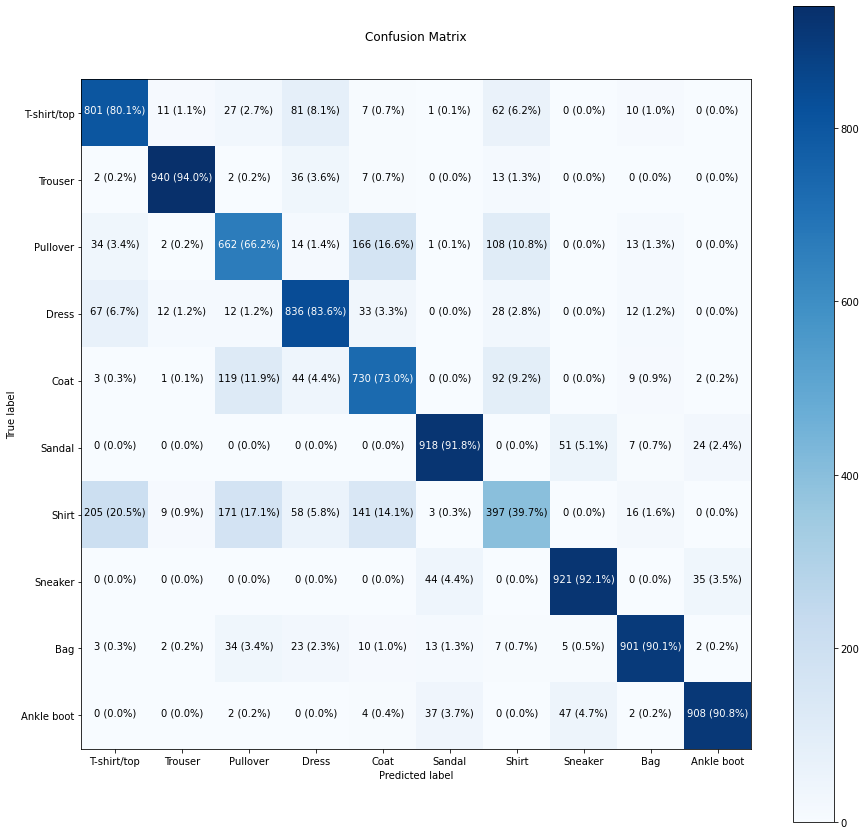

In [42]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels, 
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)